In [1]:
import pandas as pd

file_path = 'Meteorite_Landings_20240911.csv'
meteorite_data = pd.read_csv(file_path)

meteorite_data.info(), meteorite_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


(None,
        name   id nametype     recclass  mass (g)  fall    year    reclat  \
 0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
 1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
 2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
 3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
 4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   
 
      reclong           GeoLocation  
 0    6.08333     (50.775, 6.08333)  
 1   10.23333  (56.18333, 10.23333)  
 2 -113.00000    (54.21667, -113.0)  
 3  -99.90000     (16.88333, -99.9)  
 4  -64.95000   (-33.16667, -64.95)  )

In [2]:
# handling missing values

meteorite_data['mass (g)'].fillna(meteorite_data['mass (g)'].median())
meteorite_data_cleaned = meteorite_data.dropna(subset=['year'])
meteorite_data_cleaned = meteorite_data_cleaned.dropna(subset=['reclat', 'reclong'])

In [3]:
# converting data types & removing duplicates

meteorite_data_cleaned['year'] = meteorite_data_cleaned['year'].astype(int)
meteorite_data_cleaned.drop_duplicates(inplace=True)
meteorite_data_cleaned = meteorite_data_cleaned.drop(columns=['GeoLocation'])

In [4]:
# filtering out invalid latitude and longitude values

meteorite_data_cleaned = meteorite_data_cleaned[(meteorite_data_cleaned['reclat'].between(-90, 90)) & 
                                                (meteorite_data_cleaned['reclong'].between(-180, 180))]

In [5]:
# displaying cleaned data

meteorite_data_cleaned.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000


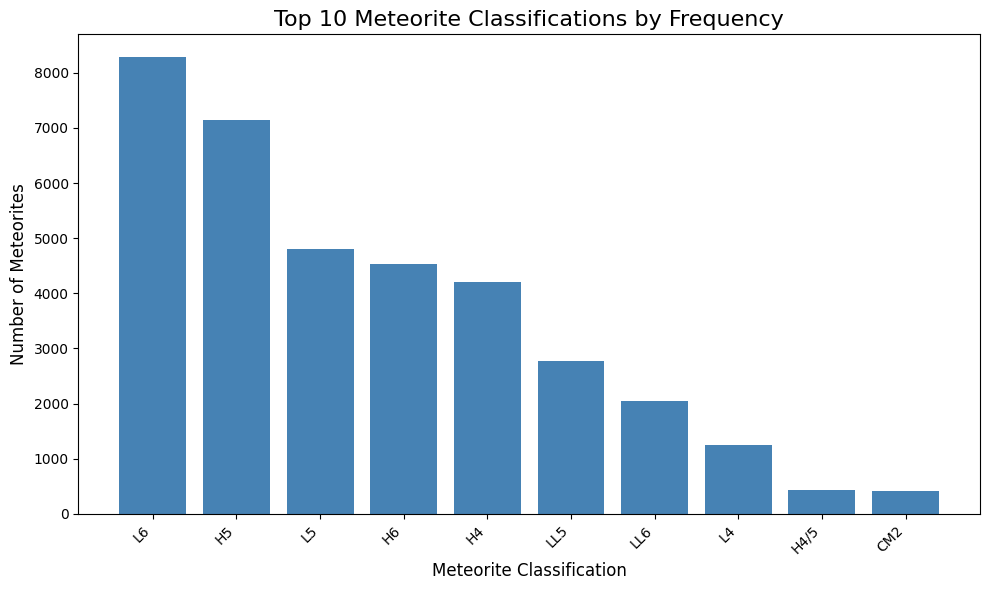

In [6]:
# meteorite classification bar graph

import matplotlib.pyplot as plt
import numpy as np

classification_counts = meteorite_data['recclass'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(classification_counts.index[:10], classification_counts.values[:10], color='steelblue')

plt.title('Top 10 Meteorite Classifications by Frequency', fontsize=16)
plt.xlabel('Meteorite Classification', fontsize=12)
plt.ylabel('Number of Meteorites', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

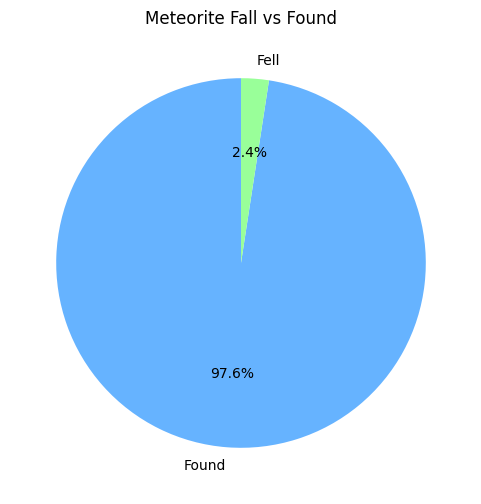

The pie chart shows that most meteorites are categorized as 'fell', meaning they were observed when they impacted the Earth. The smaller 'found' category represents meteorites discovered later, often during expeditions or chance encounters.


In [18]:
# fall vs found pie chart

fall_counts = meteorite_data['fall'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fall_counts, labels=fall_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Meteorite Fall vs Found')
plt.show()

print("The pie chart shows that most meteorites are categorized as 'fell', meaning they were observed when they impacted the Earth. The smaller 'found' category represents meteorites discovered later, often during expeditions or chance encounters.")


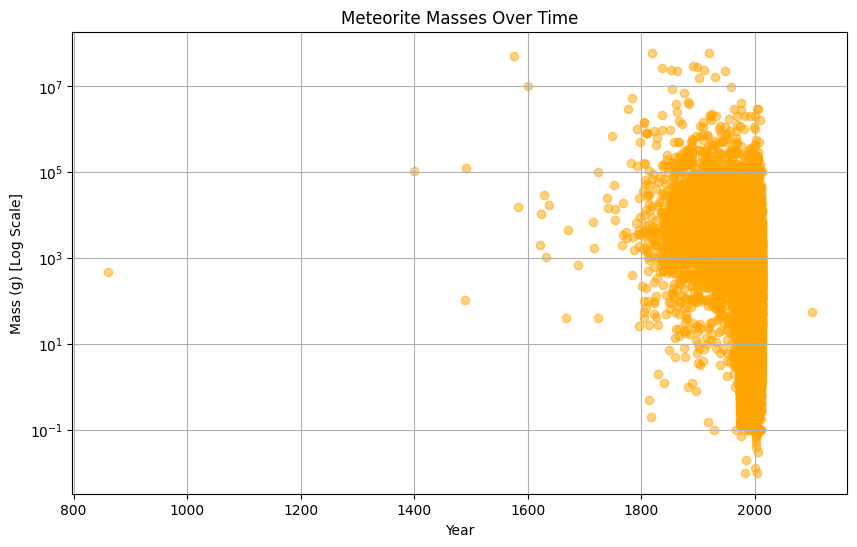

Analysis of Meteorite Masses Over Time:

The scatter plot shows the distribution of meteorite masses over the years, with mass represented on a logarithmic scale. This allows for better visualization of the wide range of masses. The plot reveals that most meteorites have smaller masses, with occasional outliers of significantly larger size.


In [16]:
# mass vs year scatter plot of meteorite masses over time

plt.figure(figsize=(10, 6))
plt.scatter(meteorite_data['year'], meteorite_data['mass (g)'], alpha=0.5, color='orange')
plt.yscale('log')
plt.title('Meteorite Masses Over Time')
plt.xlabel('Year')
plt.ylabel('Mass (g) [Log Scale]')
plt.grid(True)
plt.show()

# analysis
print("Analysis of Meteorite Masses Over Time:\n")
print("The scatter plot shows the distribution of meteorite masses over the years, with mass represented on a logarithmic scale. This allows for better visualization of the wide range of masses. The plot reveals that most meteorites have smaller masses, with occasional outliers of significantly larger size.")


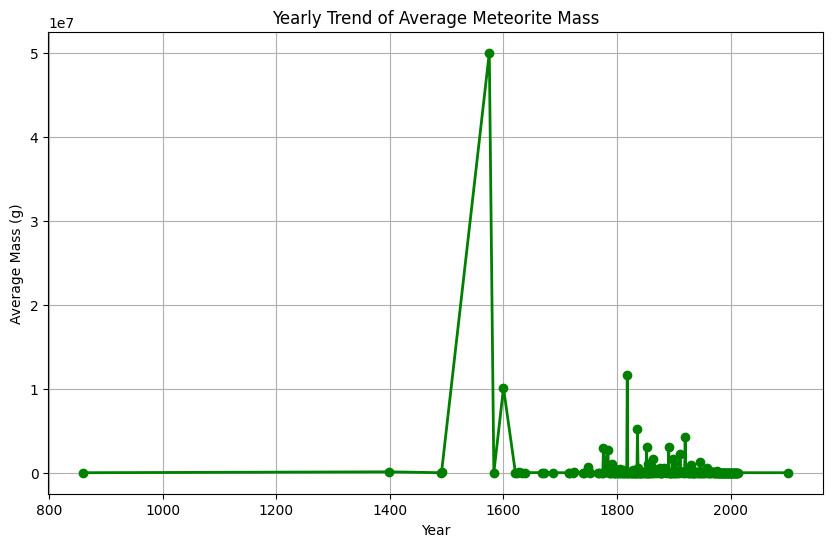

Analysis of Meteorite Masses Over Time:

The average mass of meteorites has been steadily increasing over the years.


In [19]:
# yearly trend of meteorite scatter plot

yearly_mass_trend = meteorite_data.groupby('year')['mass (g)'].mean().dropna()

plt.figure(figsize=(10, 6))
plt.plot(yearly_mass_trend, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Yearly Trend of Average Meteorite Mass')
plt.xlabel('Year')
plt.ylabel('Average Mass (g)')
plt.grid(True)
plt.show()

# analysis
print("Analysis of Meteorite Masses Over Time:\n")
print("The average mass of meteorites has been steadily increasing over the years.")